In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data.csv',dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [2]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [3]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [4]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [5]:
df.duplicated().sum()

5268

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(536641, 8)

In [9]:
df.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [10]:
#remove the negative values and replace with nan
#df[df["Quantity"]<0]=np.nan
#df[df["UnitPrice"]<0]=np.nan

In [11]:
df.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df.shape

(401604, 8)

In [64]:
df.nunique()

InvoiceNo        22190
StockCode         3684
Description       3896
Quantity           436
InvoiceDate      20460
UnitPrice          620
CustomerID        4372
Country             37
total_dollars     4041
dtype: int64

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [17]:
#get the total spent for each line item
df['total_dollars'] = df['Quantity']*df['UnitPrice']
df.describe()

,Quantity,UnitPrice,total_dollars
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,20.613638
std,250.283037,69.764035,430.352218
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,11.700000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


In [18]:
#how many orders have they made
invoice_ct = df.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
invoice_ct.columns = ['CustomerID', 'NumberOrders']
invoice_ct.describe()

,NumberOrders
count,4372.000000
mean,91.858188
std,229.223566
min,1.000000
25%,17.000000
50%,41.000000
75%,99.250000
max,7812.000000


In [19]:
#how much money have they spent
total_spend = df.groupby(by='CustomerID', as_index=False)['total_dollars'].sum()
total_spend.columns = ['CustomerID', 'total_spent']
total_spend.describe()

,total_spent
count,4372.000000
mean,1893.531433
std,8218.696204
min,-4287.630000
25%,291.795000
50%,644.070000
75%,1608.335000
max,279489.020000


In [20]:
#how many items they bought
total_items = df.groupby(by='CustomerID', as_index=False)['Quantity'].sum()
total_items.columns = ['CustomerID', 'NumberItems']
total_items.describe()

,NumberItems
count,4372.000000
mean,1119.133349
std,4672.995712
min,-303.000000
25%,151.750000
50%,364.000000
75%,956.250000
max,196719.000000


In [21]:
import functools
dfs = [total_spend,invoice_ct,total_items]
CustomerTable = functools.reduce(lambda left,right: pd.merge(left,right,on='CustomerID', how='outer'), dfs)
CustomerTable.head()

,CustomerID,total_spent,NumberOrders,NumberItems
0,12346,0.00,2,0
1,12347,4310.00,182,2458
2,12348,1797.24,31,2341
3,12349,1757.55,73,631
4,12350,334.40,17,197


In [22]:
#how many customers?
len(CustomerTable)

4372

In [23]:
CustomerTable.describe()

,total_spent,NumberOrders,NumberItems
count,4372.000000,4372.000000,4372.000000
mean,1893.531433,91.858188,1119.133349
std,8218.696204,229.223566,4672.995712
min,-4287.630000,1.000000,-303.000000
25%,291.795000,17.000000,151.750000
50%,644.070000,41.000000,364.000000
75%,1608.335000,99.250000,956.250000
max,279489.020000,7812.000000,196719.000000


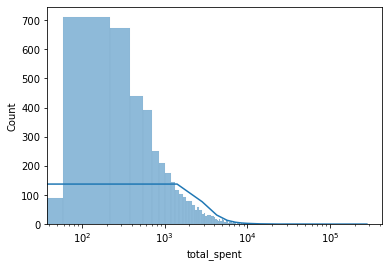

In [24]:
g=sns.histplot(CustomerTable['total_spent'],kde=True)
g.set(xscale="log");

Outlier detection using modified Z score

In [25]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [26]:
MAD = get_mad(CustomerTable.total_spent)
median = np.median(CustomerTable.total_spent)
MAD, median

(452.96500000000015, 644.0700000000002)

General guideline for modified Z score is to use 3.5 as a thresold. i.e. anything that has a mod z score of 3.5 or more is an outlier

In [27]:
def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD

Test z score function for a sample data point

In [28]:
CustomerTable['mod_z_score'] = CustomerTable.total_spent.apply(lambda x: get_modified_z_score(x, median, MAD))
CustomerTable.head()

,CustomerID,total_spent,NumberOrders,NumberItems,mod_z_score
0,12346,0.00,2,0,-0.959070
1,12347,4310.00,182,2458,5.458854
2,12348,1797.24,31,2341,1.717160
3,12349,1757.55,73,631,1.658058
4,12350,334.40,17,197,-0.461123


### General guideline is to treat anything that has a modified z score of 3.5 or more as an outlier

In [37]:
final_table=CustomerTable[CustomerTable.mod_z_score<=3.5]
final_table.head()

,CustomerID,total_spent,NumberOrders,NumberItems,mod_z_score
0,12346,0.00,2,0,-0.959070
2,12348,1797.24,31,2341,1.717160
3,12349,1757.55,73,631,1.658058
4,12350,334.40,17,197,-0.461123
5,12352,1545.41,95,470,1.342165


In [38]:
CustomerTable.shape[0]-final_table.shape[0]

539

### Here we have removed 539 outliers

In [39]:
#identify and separate big spenders for sales and marketing campaign use
def big_spender(row):
    if row['total_spent'] >= 1661.64:
        return 'Yes'
    else:
        return 'No'

In [40]:
final_table['BigSpender'] = final_table.apply(big_spender, axis=1)
final_table.head(10)

,CustomerID,total_spent,NumberOrders,NumberItems,mod_z_score,BigSpender
0,12346,0.00,2,0,-0.959070,No
2,12348,1797.24,31,2341,1.717160,Yes
3,12349,1757.55,73,631,1.658058,Yes
4,12350,334.40,17,197,-0.461123,No
5,12352,1545.41,95,470,1.342165,No
6,12353,89.00,4,20,-0.826542,No
7,12354,1079.40,58,530,0.648240,No
8,12355,459.40,13,240,-0.274988,No
9,12356,2811.43,59,1591,3.227367,Yes
11,12358,1168.06,19,248,0.780262,No


In [41]:
final_table.drop(['mod_z_score'],axis=1,inplace=True)

In [42]:
final_table.head()

,CustomerID,total_spent,NumberOrders,NumberItems,BigSpender
0,12346,0.00,2,0,No
2,12348,1797.24,31,2341,Yes
3,12349,1757.55,73,631,Yes
4,12350,334.40,17,197,No
5,12352,1545.41,95,470,No


In [43]:
final_table["BigSpender"]=np.where(final_table["BigSpender"].str.contains("Yes"),1,0)
final_table.head()

,CustomerID,total_spent,NumberOrders,NumberItems,BigSpender
0,12346,0.00,2,0,0
2,12348,1797.24,31,2341,1
3,12349,1757.55,73,631,1
4,12350,334.40,17,197,0
5,12352,1545.41,95,470,0


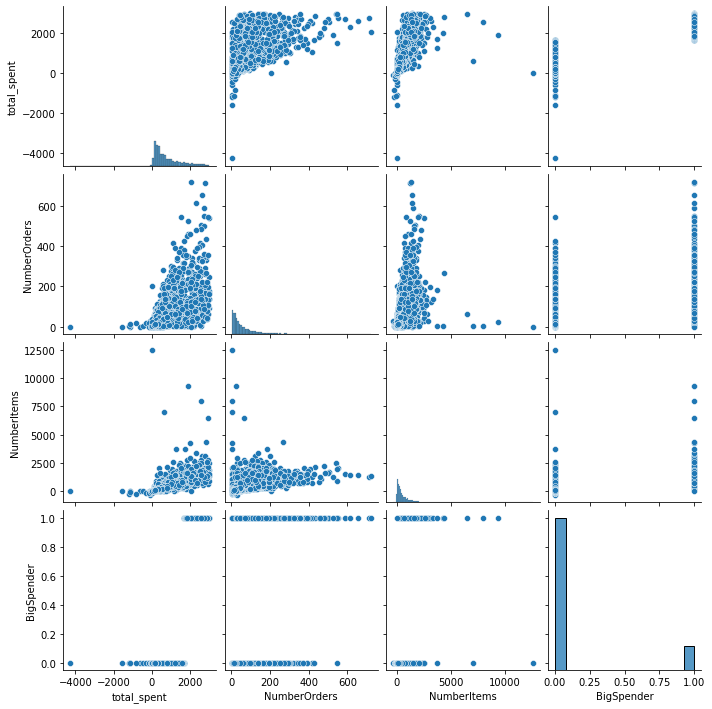

In [44]:
import seaborn as sns
sns.pairplot(final_table)

In [45]:
X=final_table.drop(["BigSpender"],axis=1)
y=final_table["BigSpender"]

In [46]:
X.head()

,CustomerID,total_spent,NumberOrders,NumberItems
0,12346,0.00,2,0
2,12348,1797.24,31,2341
3,12349,1757.55,73,631
4,12350,334.40,17,197
5,12352,1545.41,95,470


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=0)
regressor.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [49]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[648   0]
 [  0 119]]


100.0

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[643   5]
 [  9 110]]


98.17470664928291

In [52]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [53]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[646   2]
 [ 21  98]]


97.0013037809648

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [55]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[648   0]
 [  0 119]]


100.0

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[627  21]
 [  8 111]]


96.21903520208605

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [59]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[648   0]
 [  0 119]]


100.0

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [61]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[648   0]
 [  0 119]]


100.0

### Predicting whether a customer is a Big-Spender or not.

In [133]:
y_pred_new=classifier.predict([['48546',1700,500,700]])
y_pred_new

array([1])

In [134]:
y_pred_new=classifier.predict([['48546',170,100,250]])
y_pred_new

array([0])